In [1]:
# !ls /d2/caches/kaggle-planet
DATA_DIR = '/d2/caches/kaggle-planet'
DATA_DIR_TRAIN = DATA_DIR + '/train-tif-v2'
DATA_DIR_TEST = DATA_DIR + '/test-tif-v2'

In [2]:
OUT_DIR = './out'

In [3]:
%run 'Lib.ipynb'

In [4]:
train_paths = [DATA_DIR_TRAIN + '/' + x for x in list_files(DATA_DIR_TRAIN)]
test_paths = [DATA_DIR_TEST + '/' + x for x in list_files(DATA_DIR_TEST)]
all_paths = train_paths + test_paths

In [5]:
# compute mean images for each channel

In [6]:
# sum_r = np.zeros((256, 256), dtype=np.float64)
# sum_g = np.zeros((256, 256), dtype=np.float64)
# sum_b = np.zeros((256, 256), dtype=np.float64)
# sum_nir = np.zeros((256, 256), dtype=np.float64)

# for p in tqdm(all_paths):

#     d = read_geotiff(p)
    
#     r = d[:,:,0]
#     g = d[:,:,1]
#     b = d[:,:,2]
#     nir = d[:,:,3]
    
#     sum_r += r
#     sum_g += g
#     sum_b += b
#     sum_nir += nir
    

100%|██████████| 101670/101670 [36:33<00:00, 46.34it/s]


In [7]:
# mean_r = sum_r / float(len(all_paths))
# mean_b = sum_g / float(len(all_paths))
# mean_g = sum_b / float(len(all_paths))
# mean_nir = sum_nir / float(len(all_paths))

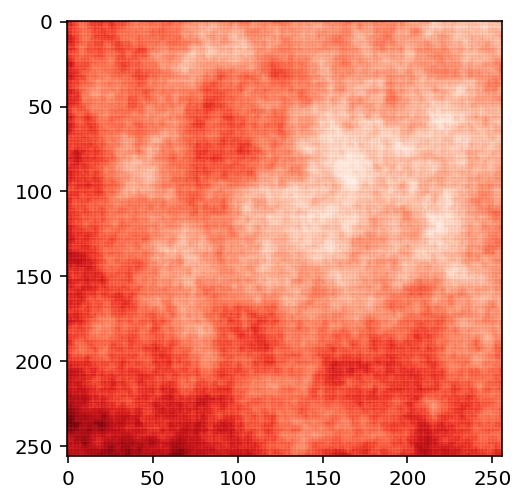

In [8]:
# plt.imshow(mean_r, cmap=plt.cm.Reds)

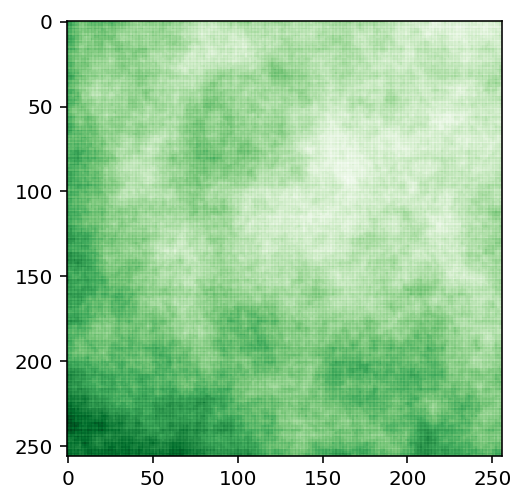

In [9]:
# plt.imshow(mean_g, cmap=plt.cm.Greens)

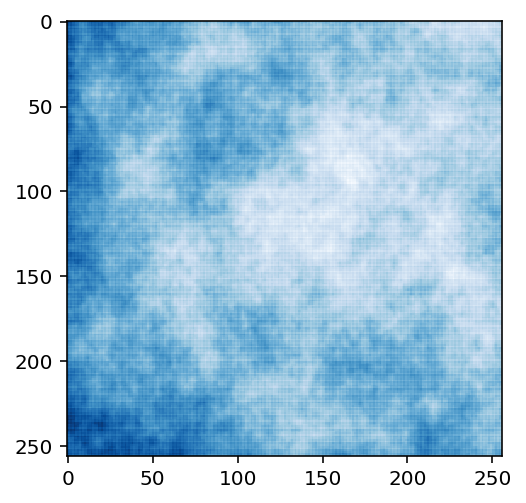

In [10]:
# plt.imshow(mean_b, cmap=plt.cm.Blues)

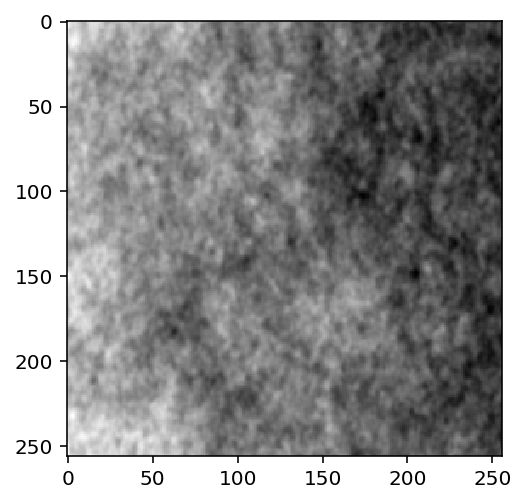

In [11]:
# plt.imshow(mean_nir, cmap=plt.cm.gray)

In [12]:
# np.save(OUT_DIR + '/mean_r.npy', mean_r)
# np.save(OUT_DIR + '/mean_g.npy', mean_g)
# np.save(OUT_DIR + '/mean_b.npy', mean_b)
# np.save(OUT_DIR + '/mean_nir.npy', mean_nir)

In [5]:
# try on a smaller subset
np.random.shuffle(all_paths)

In [6]:
all_paths_subs = all_paths[:10000]

In [7]:
sub_images = np.zeros((len(all_paths_subs), 256, 256, 4), dtype=np.int16)
print('Memory for images:', str(sub_images.nbytes / 1024**3) + ' GB')

Memory for images: 4.8828125 GB


In [8]:
i = 0
for p in tqdm(all_paths_subs):
    sub_images[i] = read_geotiff(p)
    i += 1

100%|██████████| 10000/10000 [03:40<00:00, 45.43it/s]


R std=1639.687657


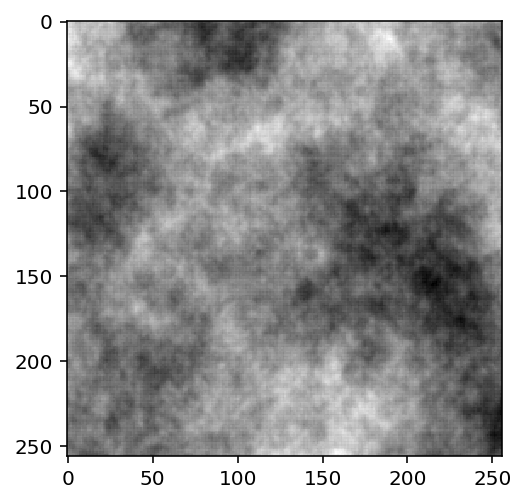

In [9]:
#  red
mean_r_sub = np.mean(sub_images[:, :, :, 0], axis=0)
std_r_sub = np.std(sub_images[:, :, :, 0])
print('R std=%f' % (std_r_sub))
plt.imshow(mean_r_sub, cmap=plt.cm.gray)

G std=1586.878328


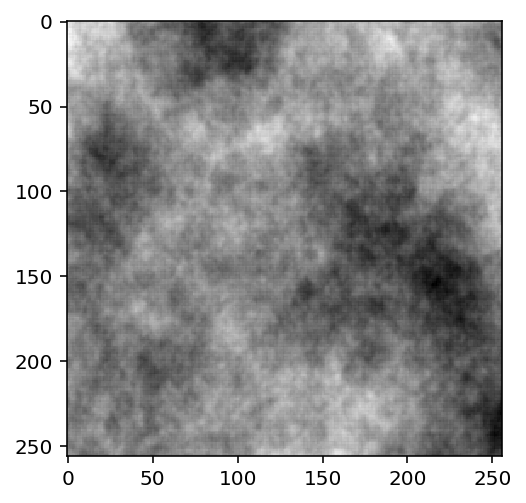

In [10]:
#  green
mean_g_sub = np.mean(sub_images[:, :, :, 1], axis=0)
std_g_sub = np.std(sub_images[:, :, :, 1])
print('G std=%f' % (std_g_sub))
plt.imshow(mean_g_sub, cmap=plt.cm.gray)

B std=1763.102651


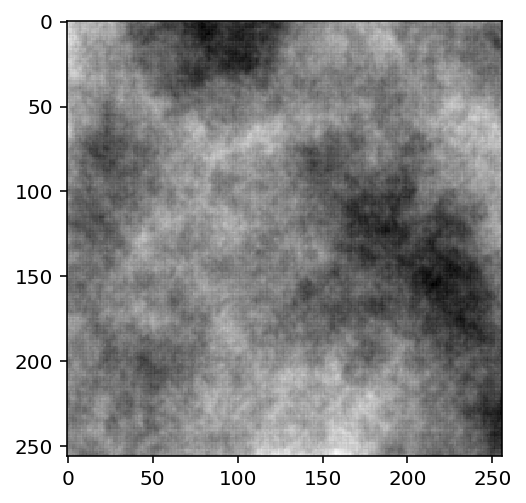

In [20]:
#  blue
mean_b_sub = np.mean(sub_images[:, :, :, 2], axis=0)
std_b_sub = np.std(sub_images[:, :, :, 2])
print('B std=%f' % (std_b_sub))
plt.imshow(mean_b_sub, cmap=plt.cm.gray)

NIR std=1881.460921


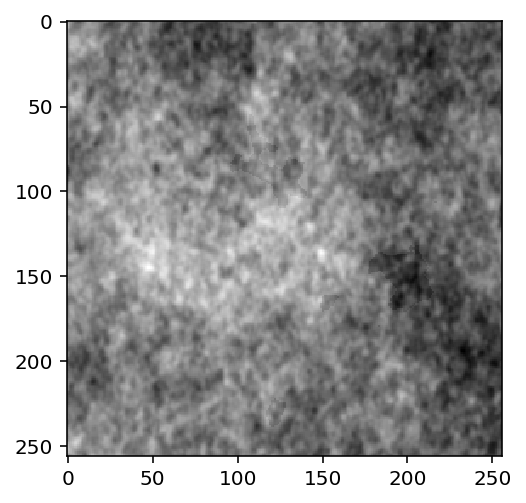

In [12]:
#  nir
mean_nir_sub = np.mean(sub_images[:,:,:,3], axis=0)
std_nir_sub = np.std(sub_images[:,:,:,3])
print('NIR std=%f'%(std_nir_sub))
plt.imshow(mean_nir_sub, cmap=plt.cm.gray)

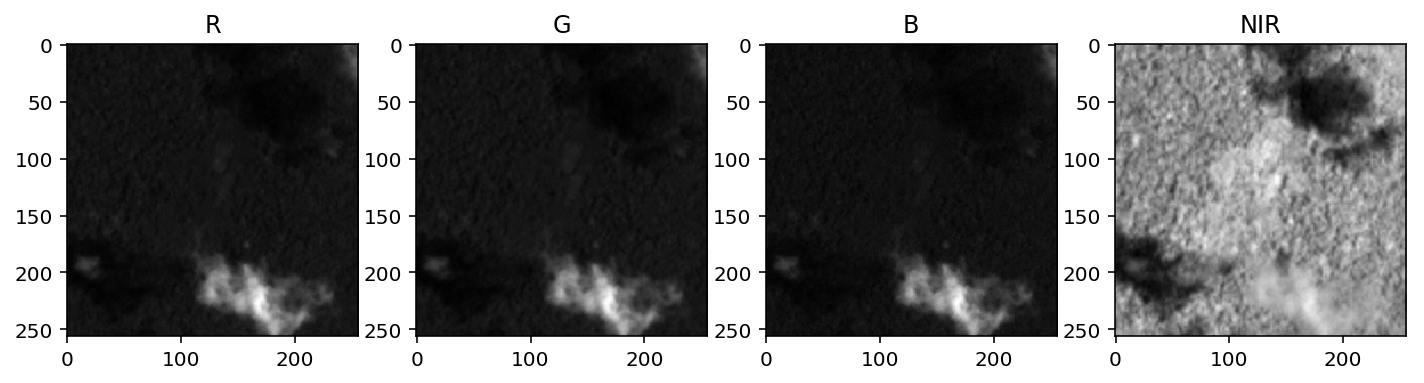

In [13]:
i = 1
(r, g, b, nir) = ((sub_images[i][:, :, 0] - mean_r_sub) / std_r_sub,
                  (sub_images[i][:, :, 1] - mean_g_sub) / std_g_sub,
                  (sub_images[i][:, :, 2] - mean_b_sub) / std_b_sub,
                  (sub_images[i][:, :, 3] - mean_nir_sub) / std_nir_sub)
fig = plt.figure()
fig.set_size_inches(12, 4)
for i, (x, c) in enumerate(((r, 'R'), (g, 'G'), (b, 'B'), (nir, 'NIR'))):
    a = fig.add_subplot(1, 4, i + 1)
    a.set_title(c)
    plt.imshow(x, cmap=plt.cm.gray)

# plt.imshow(np.dstack([r, g, b]))

In [14]:
np.save(OUT_DIR + '/mean_r_sub.npy', mean_r_sub)
np.save(OUT_DIR + '/std_r_sub.npy', std_r_sub)

In [15]:
np.save(OUT_DIR + '/mean_g_sub.npy', mean_g_sub)
np.save(OUT_DIR + '/std_g_sub.npy', std_g_sub)

In [16]:
np.save(OUT_DIR + '/mean_b_sub.npy', mean_b_sub)
np.save(OUT_DIR + '/std_b_sub.npy', std_b_sub)

In [17]:
np.save(OUT_DIR + '/mean_nir_sub.npy', mean_nir_sub)
np.save(OUT_DIR + '/std_nir_sub.npy', std_nir_sub)